#Cloning the pyRDDLGym repository to obtain the pyRDDLGym infrstructure

In [ ]:
!apt-get install python3.10


Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3.10 is already the newest version (3.10.11-1+focal1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [ ]:
!git clone https://github.com/ataitler/pyRDDLGym.git

fatal: destination path 'pyRDDLGym' already exists and is not an empty directory.


#Initializing environment in pyRDDLGym

In [ ]:
#Changing the working directory to the "pyRDDLGym" directory
%cd /content/pyRDDLGym

/content/pyRDDLGym


In [ ]:
#Installing requirements_jax.txt
!pip install -r requirements_jax.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


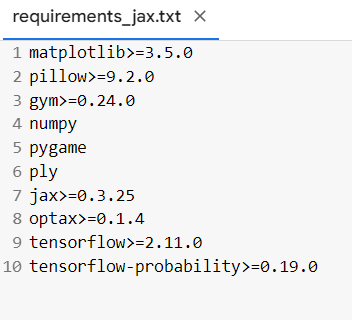

In [ ]:
#Importing the required packages
import jax
import optax
from pyRDDLGym import ExampleManager
from pyRDDLGym import RDDLEnv
from pyRDDLGym.Core.Jax.JaxRDDLBackpropPlanner import JaxRDDLBackpropPlanner, JaxStraightLinePlan,JaxDeepReactivePolicy



In [ ]:
# specify the model
EnvInfo = ExampleManager.GetEnvInfo('RaceCar')
myEnv = RDDLEnv.RDDLEnv(domain=EnvInfo.get_domain(), instance=EnvInfo.get_instance(0))
model = myEnv.model

In [ ]:
# initialize the planner
# note that actions should be constrained to [-1, 1] for Racecar
planner = JaxRDDLBackpropPlanner(
    model,
    plan=JaxDeepReactivePolicy(topology = [256, 128]),
    batch_size_train=32,
    rollout_horizon=5,
    optimizer=optax.rmsprop,
    optimizer_kwargs={'learning_rate': 0.01})

/content/pyRDDLGym/pyRDDLGym/Core/Jax/JaxRDDLBackpropPlanner.py:844: UserWarning: Initial values of pvariables will be cast to real.
  self.compiled = JaxRDDLCompilerWithGrad(
/content/pyRDDLGym/pyRDDLGym/Core/Jax/JaxRDDLBackpropPlanner.py:55: UserWarning: Using the replacement rule: a >= b --> sigmoid(a - b)
  '>=': logic.greaterEqual(),
/content/pyRDDLGym/pyRDDLGym/Core/Jax/JaxRDDLLogic.py:200: UserWarning: Using the replacement rule: a >= b --> sigmoid(a - b)
  jax_geq, jax_param = self.greaterEqual()
/content/pyRDDLGym/pyRDDLGym/Core/Jax/JaxRDDLLogic.py:208: UserWarning: Using the replacement rule: a > b --> sigmoid(a - b)
  jax_gre, jax_param = self.greater()
/content/pyRDDLGym/pyRDDLGym/Core/Jax/JaxRDDLBackpropPlanner.py:58: UserWarning: Using the replacement rule: a > b --> sigmoid(a - b)
  '>': logic.greater(),
/content/pyRDDLGym/pyRDDLGym/Core/Jax/JaxRDDLBackpropPlanner.py:59: UserWarning: Using the replacement rule: a == b --> sech^2(b - a)
  '==': logic.equal(),
/content/pyR

In [ ]:
# train for 1000 epochs using gradient ascent 
for callback in planner.optimize(jax.random.PRNGKey(42), epochs=1000, step=100):
    print('step={} train_return={:.6f} test_return={:.6f}'.format(
          str(callback['iteration']).rjust(4),
          callback['train_return'],
          callback['test_return']))

step=   0 train_return=-1.407719 test_return=-1.030465
step= 100 train_return=-0.000656 test_return=-0.000663
step= 200 train_return=-0.000723 test_return=-0.000730
step= 300 train_return=-0.000663 test_return=-0.000670
step= 400 train_return=-0.000672 test_return=-0.000678
step= 500 train_return=-0.000670 test_return=-0.000677
step= 600 train_return=-0.000667 test_return=-0.000674
step= 700 train_return=-0.000658 test_return=-0.000665
step= 800 train_return=-0.000656 test_return=-0.000663
step= 900 train_return=-0.000640 test_return=-0.000646
step= 999 train_return=-0.000024 test_return=-0.000031


In [ ]:
!pip install cloudpickle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cloudpickle as pickle

# Serialize the planner
with open('trained_planner.pkl', 'wb') as f:
    pickle.dump(planner, f)

# Deserialize the planner
with open('trained_planner.pkl', 'rb') as f:
    planner = pickle.load(f)


In [ ]:
callback['params']

{'hidden_0': {'b': Array([ 0.03018249, -0.12861435,  0.        ,  0.        ,  0.        ,
          0.        , -0.22538161, -0.05879086,  0.07720595, -0.03072068,
          0.        , -0.1012135 ,  0.        , -0.09442827,  0.        ,
         -0.07447277,  0.08529223, -0.18536073,  0.        , -0.11139543,
         -0.13632317,  0.        , -0.03742076, -0.16980165, -0.05336532,
          0.03085339,  0.0485538 ,  0.        , -0.05752765, -0.08157995,
         -0.13984548, -0.0879734 , -0.13962229,  0.02044134,  0.05724432,
         -0.07871945,  0.        ,  0.        ,  0.        ,  0.        ,
          0.13663092, -0.09199302,  0.07820658,  0.        ,  0.00590906,
         -0.03326691,  0.        ,  0.05975701,  0.09361162,  0.03498979,
          0.        , -0.10899185, -0.11562796,  0.        ,  0.        ,
          0.        , -0.02272762, -0.02915849, -0.03996691, -0.07680539,
         -0.08109421,  0.        ,  0.        , -0.03869419,  0.01416544,
          0.07827426,

In [ ]:
policy_weights = {'cut-out': 10.0, 'put-out': 10.0}

In [ ]:
# Get the final action sequence
final_params = callback['params']
final_plan = planner.get_action(jax.random.PRNGKey(42), final_params, 0, None, policy_weights)
print("Final Plan:", final_plan)

AttributeError: ignored